In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import time

Data Preparation

In [4]:
student = pd.read_csv("student-por.csv" ,sep=';')
student.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
student['final_grade'] = 'na'
student.loc[(student.final_score >= 15) & (student.final_score <= 20), 'final_grade'] = 'good' 
student.loc[(student.final_score >= 10) & (student.final_score <= 14), 'final_grade'] = 'fair' 
student.loc[(student.final_score >= 0) & (student.final_score <= 9), 'final_grade'] = 'poor'

# create dataframe dfd for classification
data = student.copy()
data = data.drop([ 'final_score'], axis=1)
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data.final_grade = le.fit_transform(data.final_grade)

# dataset train_test_split
X = data.drop('final_grade',axis=1)
y = data.final_grade

def normalization(X):
    mean = np.mean(X)
    std = np.std(X)
    X_t = (X - mean)/std
    return X_t

#Normalization
X_t = normalization(X)
X = X_t
X_norm=X.dropna(axis=1,how='all')

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.3)

In [11]:
clf_nn = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=7, max_iter=1000)
clf_nn.fit(X_train, y_train)
y_pred = clf_nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of neural network without hyperparameter tuning is %.2f%%' % (nn_accuracy * 100))

Accuracy of neural network without hyperparameter tuning is 85.13%


C:\Users\12619\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
pca = PCA()
pca.fit(X_train)

PCA()

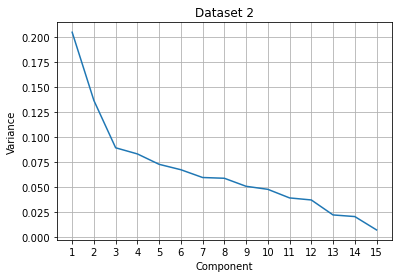

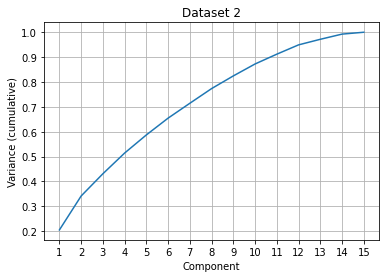

In [19]:
# Plot variance explained by each component to find the best number of components
plt.figure()
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_)
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Dataset 2')
plt.grid()

plt.figure()
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance (cumulative)')
plt.title('Dataset 2')
plt.grid()

In [20]:
# Choose the number of components that capture 85% of the variance
num_components = 10

# Transform the data
pca = PCA(n_components=num_components)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [21]:
clf_nn = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=7, max_iter=1000)
clf_nn.fit(X_train_pca, y_train)
y_pred = clf_nn.predict(X_test_pca)
nn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of neural network without hyperparameter tuning is %.2f%%' % (nn_accuracy * 100))

Accuracy of neural network without hyperparameter tuning is 76.92%
